In [ ]:
import kagglehub
# some imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Iris.csv")

df.head()




Path to dataset files: /kaggle/input/iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
import time
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def clean_column(series):
    return (
        series.astype("category").cat.codes
    )


class CustomLinerarRegression:
  def __init__(self, from_params, to_param, df):
    try:
      print(f"Your model has {int(df.isnull().sum().sum())} null fields")
    except Exception as e:
      print(f"Error creating Linear Regression error: {e}")
      return
    if not all(item in from_params for item in df.colums) or not to_param in df.columns:
      print(f"Theese params not in colums of given df:{[i for i in [from_param, to_param] if not i in df.columns]}")
      return
    self.df = df
    self.from_params = from_params
    self.to_param = str(to_param)


  def RunModel(self):
    # SAVING X and Y of the DataFrame
    # Clean and convert inputs
    self.X = clean_column(self.df[self.from_params]).values.reshape(-1, 1)
    self.y = clean_column(self.df[self.to_param])

    # running the linear regression model
    model = LinearRegression()
    reg=model.fit(self.X,self.y)

    # SAVING MODELS's SCORE
    self.score = reg.score(self.X, self.y)
    # PRINTING RESULTS
    print(f"created model with score {reg.score(self.X, self.y)}")
    print(f"coef: {model.coef_}")
    print(f"intercept: {model.intercept_}")

    # saving the whole model
    self.last_learned = time.time()
    self.model = model
  def Predict(self, x):
    return self.model.predict(x)
  def ShowPlot(self):
    plt.plot(self.X, self.y, "bo")
    plt.xlabel(self.from_params, fontsize=20)
    plt.ylabel(self.to_param, fontsize=20)


    x1 = self.X.max()
    x2 = self.X.min()
    y1 = self.model.intercept_ + x1 * self.model.coef_
    y2 = self.model.intercept_ + x2 * self.model.coef_
    plt.plot([x1, x2], [y1, y2], linewidth=1.0, color="r")

    plt.title(f"Linear Regression: {self.from_param} vs {self.to_param}", fontsize=16)
    plt.grid(True)
    plt.show()





Your model has 0 null fields
created model with score 0.8924791472100109
coef: [0.51950737]
intercept: -0.46836746133808127


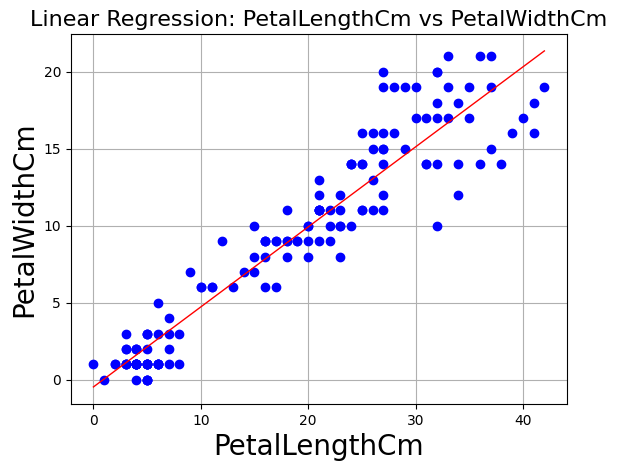

In [37]:
CLR = CustomLinerarRegression('PetalLengthCm', 'PetalWidthCm', df)
CLR.RunModel()
CLR.ShowPlot()

Your model has 0 null fields
created model with score 0.8980755558850981
coef: [7.41]
intercept: 1.5766666666666662


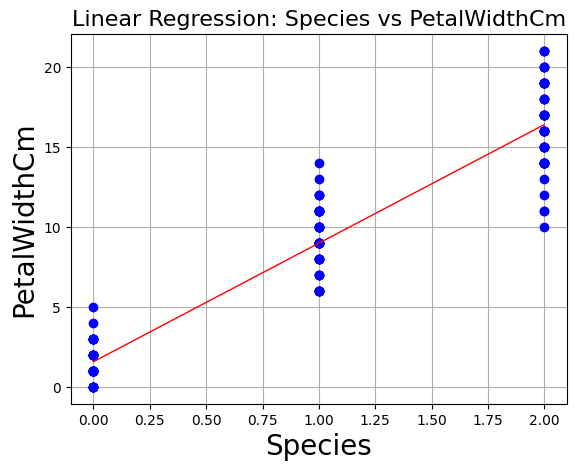

In [36]:
CLR = CustomLinerarRegression('Species', 'PetalWidthCm', df)
CLR.RunModel()
CLR.ShowPlot()
